In [1]:
import numpy as np
data2 = np.load('reco-2-101-2.npy')
data1 = np.load('reco-1-101-2.npy')
data0 = np.load('reco-0-101-2.npy')

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

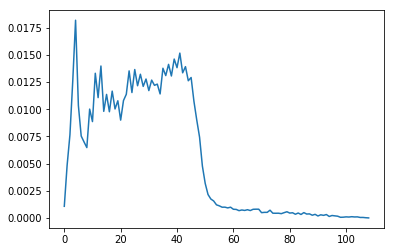

In [3]:
#plt.plot(data0[:,55,55])

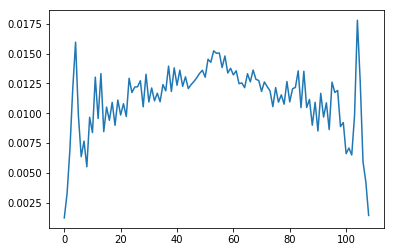

In [4]:
#plt.plot(data1[:,55,55])

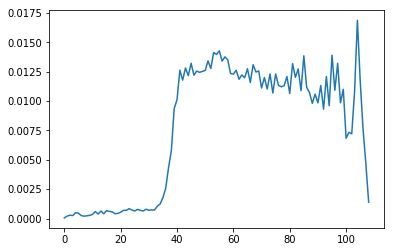

In [129]:
plt.plot(data2[:,55,55])

In [103]:
#data0.shape

(109, 101, 101)

In [6]:
from path import Path

In [7]:
import pydicom

In [8]:
pet_dir_path = Path('/mnt/data/olivierv/Cyl/PET_WB_UNCORRECTED_0007/')
ct_dir_path = Path('/mnt/data/olivierv/Cyl/AC_CT_0003/')
petcorr_dir_path = Path('/mnt/data/olivierv/Cyl/PET_WB_0004/')

In [9]:
%%time
#volume = np.array([pydicom.dcmread(f).pixel_array for f in ct_dir_path.listdir()])

imasct = [pydicom.dcmread(f) for f in ct_dir_path.listdir()]

shuffled_volumect = np.array([ima.pixel_array for ima in imasct])

pos = [int(ima.InstanceNumber) - 1 for ima in imasct]

volumect = np.zeros_like(shuffled_volumect)

volumect[pos] = shuffled_volumect

CPU times: user 556 ms, sys: 276 ms, total: 832 ms
Wall time: 3 s


In [10]:
imaspt = [pydicom.dcmread(f) for f in pet_dir_path.listdir()]

shuffled_volumept = np.array([ima.pixel_array for ima in imaspt])

pos = [int(ima.InstanceNumber) - 1 for ima in imaspt]

volumept = np.zeros_like(shuffled_volumept)

volumept[pos] = shuffled_volumept

In [11]:
imasptcorr = [pydicom.dcmread(f) for f in petcorr_dir_path.listdir()]

shuffled_volumeptc = np.array([ima.pixel_array for ima in imasptcorr])

pos = [int(ima.InstanceNumber) - 1 for ima in imasptcorr]

volumeptc = np.zeros_like(shuffled_volumeptc)

volumeptc[pos] = shuffled_volumeptc

In [12]:
#imasptc = [pydicom.dcmread(f) for f in petcorr_dir_path.listdir()]
list_of_dir = [pet_dir_path,petcorr_dir_path]
a =[]
b=[]
for x in list_of_dir:
    for f in x.listdir():
        if x in ['/mnt/data/olivierv/Cyl/PET_WB_UNCORRECTED_0007/']:
            imaf = pydicom.dcmread(f)
            a.append(imaf.InstanceNumber)
        else:
            imag = pydicom.dcmread(f)
            b.append(imag.InstanceNumber)
   
    #if imaf.InstanceNumber != imag.InstanceNumber:
        #print ( imaf.InstanceNumber)
   


In [13]:
len(match)

NameError: name 'match' is not defined

In [72]:
match = np.column_stack((a,b))
for s in range(158):
    if match[s,0]!=match[s,1]:
    #print('uncorr:' match[0],'corr:' match[1])
    #    print("uncorr:", match[s,0],"corr:",match[s,1])

SyntaxError: unexpected EOF while parsing (<ipython-input-72-5b60784c9e74>, line 5)

In [15]:
imapet = pydicom.dcmread(pet_dir_path.listdir()[143])
imapetc = pydicom.dcmread(petcorr_dir_path.listdir()[8])
imapetc.InstanceNumber - imapet.InstanceNumber

0

In [16]:
#for f in pet_dir_path.listdir():
for s in range(158):
#    a_ = pydicom.dcmread(f)
    a_ = pydicom.dcmread(pet_dir_path.listdir()[s])
    if a_.InstanceNumber == imapetc.InstanceNumber:
        print(f, s)

/mnt/data/olivierv/Cyl/PET_WB_0004/FANTOMET_CYLINDRISKA.PT.PET_WB_FDG_UTAN_IVK_(ADULT).0004.0104.2017.10.04.08.30.13.131607.37931593.IMA 143


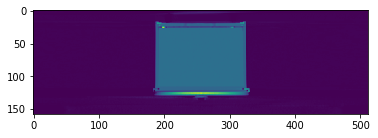

In [40]:
plt.imshow(volumect[:,250,:])

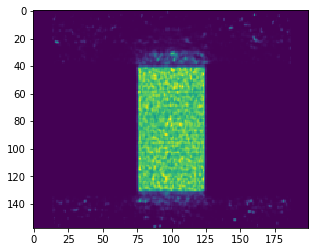

In [134]:
plt.imshow(volumeptc[:,100,:])

In [117]:

test = np.roll(volumect, 15, axis=0)
new_size_i = 200
new_size_j = 200
down_size = (158,200,200)
test_down = np.zeros(down_size)
for z in range(158):
    slice_or = test[z-1,:,:]
#slice_down = np.zeros[new_size_i,new_size_j]
    slice_down = resize(slice_or,(new_size_i, new_size_j), anti_aliasing=True)
    test_down[z] = slice_down

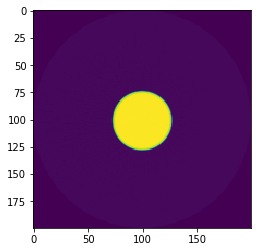

In [124]:
plt.imshow(test_down[75,:,:])

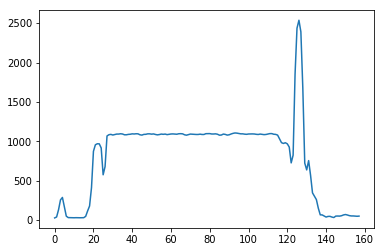

In [104]:
plt.plot(volumect[:,250,250])

In [20]:
imapet = pydicom.dcmread(pet_dir_path.listdir()[143])
imact = pydicom.dcmread(ct_dir_path.listdir()[8])
imapetc = pydicom.dcmread(petcorr_dir_path.listdir()[8])

In [21]:
imapetc.InstanceNumber - imapet.InstanceNumber

0

In [66]:
imact.SliceLocation

"409.5"

In [23]:
imapetc.ImagePositionPatient

['-406.126', '-506.44', '229.5']

In [24]:
imapet.ImagePositionPatient

['-406.126', '-506.44', '229.5']

In [25]:
imact.ImagePositionPatient

['-389.23828125', '-488.23828125', '409.5']

In [26]:
petorigo = [float(imapet.ImagePositionPatient[0]), float(imapet.ImagePositionPatient[1]),-float(imapet.ImagePositionPatient[2])]
ctorigo = [float(imact.ImagePositionPatient[0]), float(imact.ImagePositionPatient[1]),float(imact.ImagePositionPatient[2])]

In [27]:
transl =[petorigo[i]-ctorigo[i] for i in range(3)]
transl

[-16.887718749999976, -18.201718749999998, -639.0]

In [67]:
volumect.shape

(158, 512, 512)

In [273]:
transl[1]/float(imapet.PixelSpacing[1])

-4.469059290468789

In [68]:
volumept.shape

(158, 200, 200)

In [63]:
imact.PixelSpacing

['1.5234375', '1.5234375']

In [69]:
imact = pydicom.dcmread(ct_dir_path.listdir()[8])

In [76]:
imact.InstanceNumber

"8"

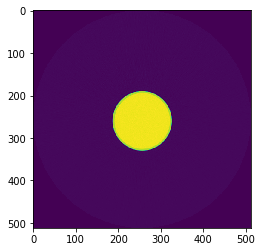

In [79]:
plt.imshow(volumect[50,:,:])

In [84]:
new_size_i = 200
new_size_j = 200
slice_or = volumect[50,:,:]
#slice_down = np.zeros[new_size_i,new_size_j]
scale = 2.56
s = (new_size_i,new_size_j)
slice_down = np.zeros(s)
for i in range(new_size_i):
    for j in range(new_size_j):
        slice_down[i,j]=slice_or[i*scale,j*scale]


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [96]:
from skimage.transform import resize

In [97]:
slice_or = volumect[50,:,:]
new_size_i = 200
new_size_j = 200
slice_down = resize(slice_or,(new_size_i, new_size_j), anti_aliasing=True)

/opt/tljh/user/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


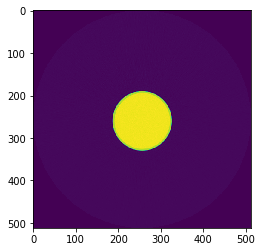

In [99]:
plt.imshow(slice_or)

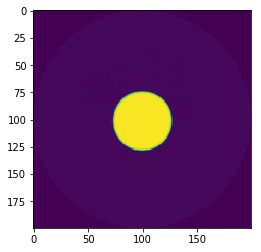

In [100]:
plt.imshow(slice_down)

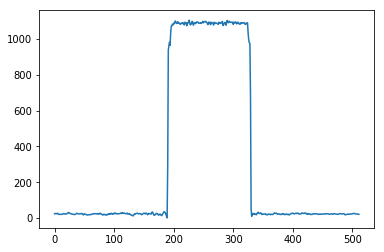

In [102]:
plt.plot(slice_or[:,250])

In [103]:
volumect.shape

(158, 512, 512)